In [19]:
import numpy as np
from glob import glob

import des_utils

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'

In [61]:
reload(des_utils)

<module 'des_utils' from 'des_utils.py'>

In [62]:
sim_files = glob("ZD_KNDES_TEST/*DAT")
sim_triggers, sim_colors, sim_ifluxes = des_utils.extract_colors(sim_files)

In [63]:
print "{} triggers out of {} files".format(np.sum(sim_triggers), len(sim_triggers))

684 triggers out of 1001 files


-1381.3838 1826.2722


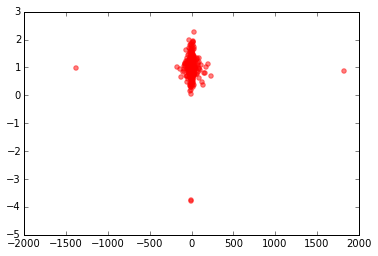

In [64]:
plt.scatter(sim_ifluxes[sim_triggers], sim_colors[sim_triggers], alpha=0.5, color='r')
print sim_ifluxes[sim_triggers].min(), sim_ifluxes[sim_triggers].max()
xlow, xhigh = plt.xlim()

In [65]:
data_files = glob("./DESY1_numepoch1_iz_real_text/*.dat")
data_triggers, data_colors, data_ifluxes = des_utils.extract_colors(data_files)

(-2000.0, 2000.0)

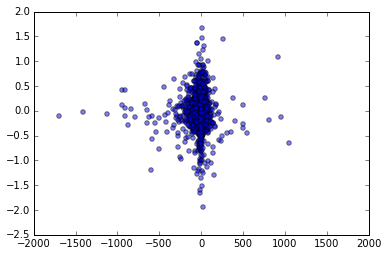

In [66]:
plt.scatter(data_ifluxes[data_triggers], data_colors[data_triggers], alpha=0.5)
plt.xlim(xlow, xhigh)

(-1, 2)

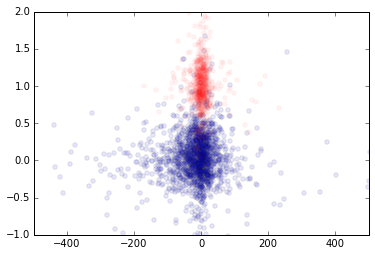

In [68]:
plt.scatter(data_ifluxes[data_triggers], data_colors[data_triggers], alpha=0.1)
plt.scatter(sim_ifluxes[sim_triggers], sim_colors[sim_triggers], alpha=0.05, color='r')
plt.xlim(-500, 500)
plt.ylim(-1, 2)